In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


## 1차 함수 RANSAC

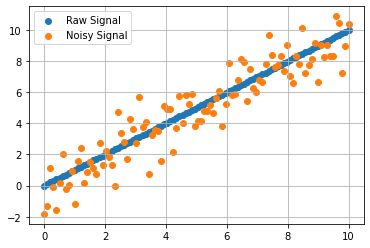

In [2]:
x = np.linspace(0, 10, 100)
a = 1

noise = np.random.normal(0,1,100)

y = a * x
y_noisy = (a * x) + noise

plt.scatter(x,y)
plt.scatter(x,y_noisy)
plt.grid()
plt.legend(['Raw Signal', 'Noisy Signal'])
plt.show()

[16.22779862148888, 56.07549656031379]
16.22779862148888
56.07549656031379
First Point = ( 6 , 16.22779862148888 )
Second Point = ( 67 , 56.07549656031379 )
x1 =  6
y1 =  16.22779862148888
x2 =  67
y2 =  56.07549656031379
inclination =  0.6532409498168018
bias =  12.30835292258807
inliner_cnt =  48


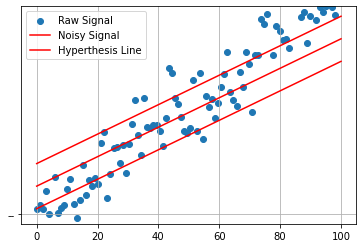

In [23]:
time = np.linspace(0, 100, 100)
a = 1

noise = np.random.normal(0,10,100)

y = np.array(a * time)
y_noisy = np.array((a * time) + noise)

###############################################################

# 1. Select the points randomly

selectPoint = random.sample(y_noisy.tolist(), 2)
print(selectPoint)

print(selectPoint[0])
print(selectPoint[1])

point1 = list()
point2 = list()

for i, data in enumerate(y_noisy):
    if(data == selectPoint[0]):
        print("First Point = (",i, ",", data, ")")
        point1 = [i, data]

    if(data == selectPoint[1]):
        print("Second Point = (",i, ",", data, ")")
        point2 = [i, data]

# 2. Line equation using two points
# y = ax + b
# b = y - ax

print("================================")
print("x1 = ", point1[0])
print("y1 = ", point1[1])
print("x2 = ", point2[0])
print("y2 = ", point2[1])
print("================================")

inclination = (point2[1] - point1[1]) / (point2[0] - point1[0])
bias = point1[1] - inclination*point1[0]

print("inclination = ", inclination)
print("bias = ", bias)

hyp_line = (inclination * time) + bias


# 3. Line with the 
bias2 = 10
hyp_line_up = (inclination * time) + bias + bias2
hyp_line_down = (inclination * time) + bias - bias2


## 4. Count the inliner

inliner_cnt = 0

for i in range(len(hyp_line)):
    if((hyp_line_up[i] > y_noisy[i]) and (hyp_line_down[i] < y_noisy[i])):
        inliner_cnt = inliner_cnt + 1
    
print("inliner_cnt = ", inliner_cnt)

###############################################################

# plt.scatter(time, y)
plt.scatter(time, y_noisy)

plt.plot(time, hyp_line, 'r')
plt.plot(time, hyp_line_up, 'r', '--')
plt.plot(time, hyp_line_down, 'r', '--')


plt.grid()
plt.legend(['Raw Signal', 'Noisy Signal', 'Hyperthesis Line'])
plt.show()

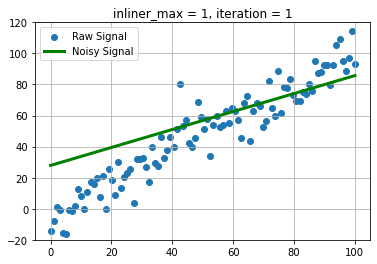

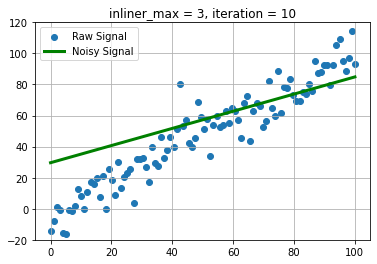

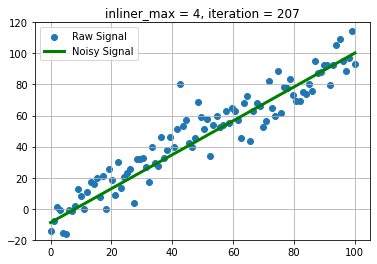

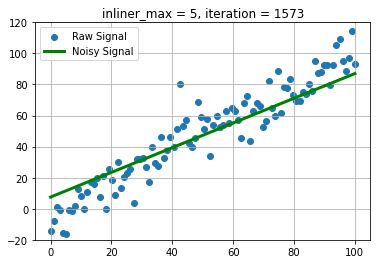

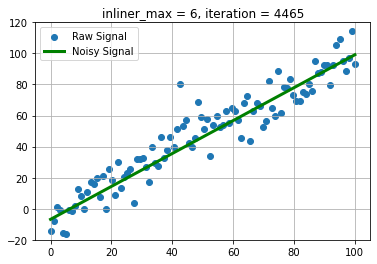

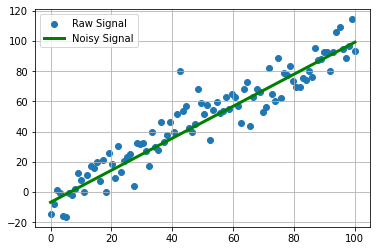

In [19]:
# RANSAC - 2차원 직선

iteration_max = 10000
inliner_max = 0
bias = 0.1

ransac_line = list()

for iteration in range(iteration_max):
    
    # 1. Select the points randomly
    selectPoint = random.sample(y_noisy.tolist(), 2)

    # 2. Line equation using two points
    # y = ax + b
    # b = y - ax
    point1 = list()
    point2 = list()

    for i, data in enumerate(y_noisy):
        if(data == selectPoint[0]):
            point1 = [i, data]

        if(data == selectPoint[1]):
            point2 = [i, data]
            
    inclination = (point2[1] - point1[1]) / (point2[0] - point1[0])
    b = point1[1] - inclination*point1[0]

    hyp_line = (inclination * time) + b
    
    # 3. Line with the bias
    hyp_line_up = (inclination * time) + b + bias
    hyp_line_down = (inclination * time) + b - bias
    
    ## 4. Count the inliner
    inliner_cnt = 0

    for i in range(len(hyp_line)):
        if((hyp_line_up[i] > y_noisy[i]) and (hyp_line_down[i] < y_noisy[i])):
            inliner_cnt = inliner_cnt + 1
            
    ## 5. Max inliner
    if(inliner_max < inliner_cnt):
        inliner_max = inliner_cnt
        ransac_line = hyp_line
        
        
#         plt.scatter(time, y)
        plt.scatter(time, y_noisy)
        plt.plot(time, ransac_line, 'g', linewidth=3)

        plt.grid()
        plt.legend(['Raw Signal', 'Noisy Signal', 'RANSAC Line'])
        plt.title('inliner_max = ' + str(inliner_max) + ", " + 'iteration = ' + str(iteration))
        plt.ylim([-20, 120])
        plt.show()
    
###############################################################

# plt.scatter(time, y)
plt.scatter(time, y_noisy)
plt.plot(time, ransac_line, 'g', linewidth=3)

plt.grid()
plt.legend(['Raw Signal', 'Noisy Signal', 'RANSAC Line'])
plt.show()

In [21]:
# RANSAC Class

class RANSAC_Class:
    def __init__(self, iter_max, bias):
        self.iter_max = 1000
        self.bias = 10
        
        self.inputData = list()
        self.inliner_max = 0
        self.ransac_line = list()
        
    def setData(self, inputData):
        self.inputData = inputData
        
    def getRANSAC(self):
        return self.ransac_line
    
    def selectPoints(self):
        self.selectPoint = random.sample(self.inputData, 2)
        
    def makeHypothesisLine(self):
        point1 = list()
        point2 = list()

        for i, data in enumerate(self.inputData):
            if(data == self.selectPoint[0]):
                point1 = [i, data]

            if(data == self.selectPoint[1]):
                point2 = [i, data]

        inclination = (point2[1] - point1[1]) / (point2[0] - point1[0])
        b = point1[1] - inclination*point1[0]

        hyp_line = (inclination * time) + b

        hyp_line_up = (inclination * time) + b + bias
        hyp_line_down = (inclination * time) + b - bias

        inliner_cnt = 0

        for i in range(len(hyp_line)):
            if((hyp_line_up[i] > self.inputData[i]) and (hyp_line_down[i] < self.inputData[i])):
                inliner_cnt = inliner_cnt + 1

        if(self.inliner_max < inliner_cnt):
            self.inliner_max = inliner_cnt
            self.ransac_line = hyp_line
        
    def processRANSAC(self):
        for iteration in range(iteration_max):
            self.selectPoints()
            self.makeHypothesisLine()
    
    


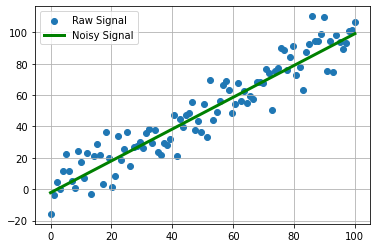

In [22]:
# Input Data
time = np.linspace(0, 100, 100)
a = 1

noise = np.random.normal(0,10,100)

y = np.array(a * time)
y_noisy = np.array((a * time) + noise)

y = y.tolist()
y_noisy = y_noisy.tolist()

############################################
############################################

# Process the RANSAC
iter_max = 1000
bias = 10
ransac = RANSAC_Class(iter_max, bias)

ransac.setData(y_noisy);
ransac.processRANSAC()
ransac_line = ransac.getRANSAC()

# Visualization
# plt.scatter(time, y)
plt.scatter(time, y_noisy)
plt.plot(time, ransac_line, 'g', linewidth=3)

plt.grid()
plt.legend(['Raw Signal', 'Noisy Signal', 'RANSAC Line'])
plt.show()

## 3차원 평면 RANSAC

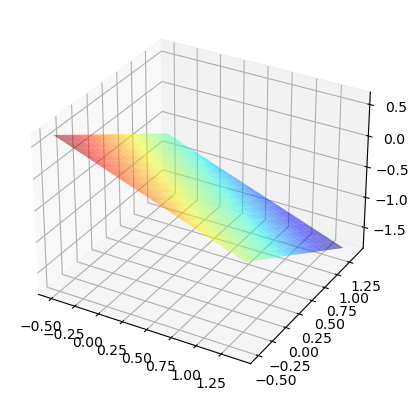

In [400]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import preprocessing

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x = [0, 0, 1, 1]
# y = [0, 1, 0, 1]
# z = [-1, -1, -1, -1]

# 평면의 방정식
X = np.arange(-0.5, 1.5, 0.1)
Y = np.arange(-0.5, 1.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (-5/7 * Y) + (-4/7 * X)

# ax.plot(x, y, z, linestyle="none", marker="o", mfc="none", markeredgecolor="red")

# ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.5, cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)

plt.rcParams['figure.figsize'] = [5.0, 5.0]
# plt.rcParams['figure.dpi'] = 100

plt.show()

1. Select the points randomly
x_select =  [61.779939735322955, -98.1440724005499, -207.3657616346122]
y_select =  [-101.16139995646553, 166.85042750703983, 78.14710285770481]
z_select =  [-2.687655297138246, 4.6363402107261145, 3.959806342813107]
2. Plane equation
v12 =  [-159.92401214  268.01182746    7.32399551]
v13 =  [-269.14570137  179.30850281    6.64746164]
n =  [  468.34367298  -908.13317181 43458.49609798]
d =  -4000.8096565815213
3. Calculate the number of the inliner points
Length of Z =  1000
Length of inliner point =  668


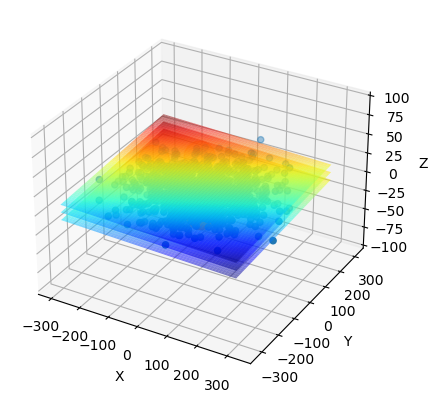

In [443]:
x = np.random.normal(0,100,1000)
y = np.random.normal(0,100,1000)
z = np.random.normal(0,10,1000)

###########################################################

# 1. Select the points randomly
x_select = random.sample(x.tolist(), 3)
y_select = random.sample(y.tolist(), 3)
z_select = random.sample(z.tolist(), 3)

print("==================================================")
print("1. Select the points randomly")
print("x_select = ", x_select)
print("y_select = ", y_select)
print("z_select = ", z_select)

# 2. Plane equation
point1 = np.array([x_select[0], y_select[0], z_select[0]])
point2 = np.array([x_select[1], y_select[1], z_select[1]])
point3 = np.array([x_select[2], y_select[2], z_select[2]])

v12 = point2 - point1
v13 = point3 - point1

n = np.cross(v12, v13)
d = -np.inner(n, point1)

# n = [a, b, c]
# d = [n * p1] or [n * p2] or [n * p3]
# ax + by + cz + d = 0
# z -a/c * x -b/c * y -d/c

# 평면의 방정식
X = np.arange(-300, 300, 10)
Y = np.arange(-300, 300, 10)
X, Y = np.meshgrid(X, Y)
Z = (-n[0]/n[2] * X) + (-n[1]/n[2] * Y) - d/n[2]
Z_upper = Z + 10
Z_lower = Z - 10

print("==================================================")
print("2. Plane equation")
print("v12 = ", v12)
print("v13 = ", v13)
print("n = ", n)
print("d = ", d)

# 3. Calculate the number of the inliner points

print("==================================================")
print("3. Calculate the number of the inliner points")

print("Length of Z = ", len(z))


inliner_cnt = 0

for i in range(len(z)):
    
    check_z_upper = (-n[0]/n[2] * x[i]) + (-n[1]/n[2] * y[i]) - d/n[2] + 10
    check_z_lower = (-n[0]/n[2] * x[i]) + (-n[1]/n[2] * y[i]) - d/n[2] - 10
    
    if(z[i] < check_z_upper and z[i] > check_z_lower):
        inliner_cnt = inliner_cnt + 1

print("Length of inliner point = ", inliner_cnt)

###########################################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, cmap=cm.jet)
ax.scatter(x_select, y_select, z_select, 'ro', s=500)

# Plane equation with Random points
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)

ax.plot_surface(X, Y, Z_upper, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)
ax.plot_surface(X, Y, Z_lower, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)

# Limit
ax.axes.set_zlim3d(bottom = -100, top = 100) 

# Label
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.rcParams['figure.figsize'] = [5.0, 5.0]


plt.show()

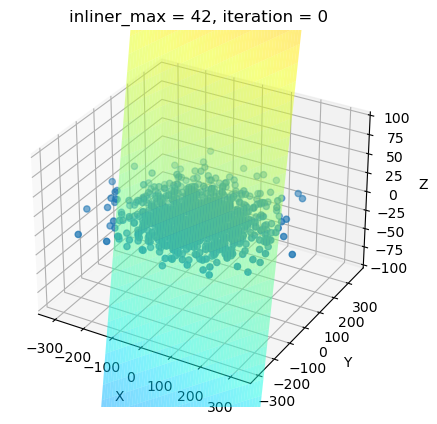

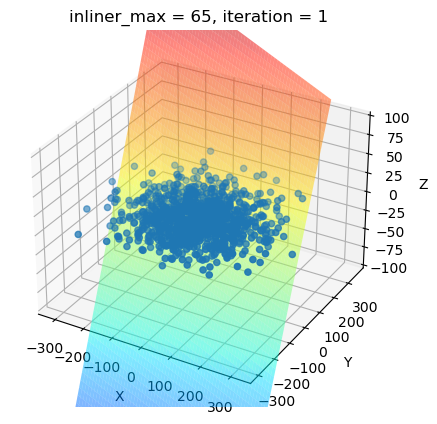

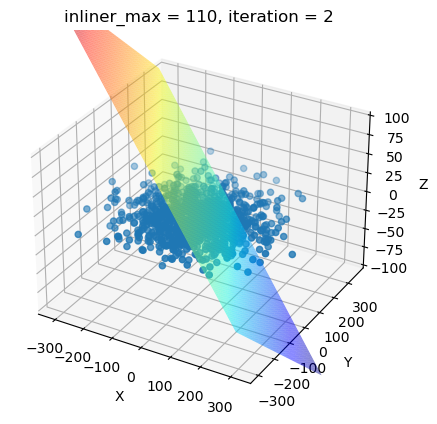

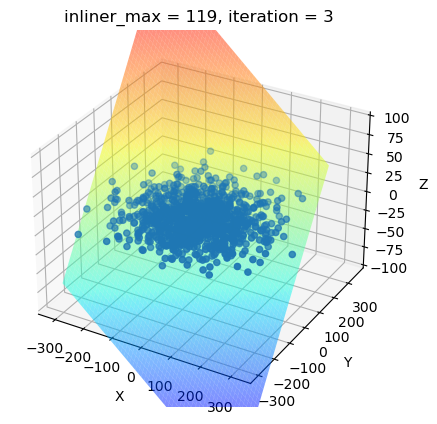

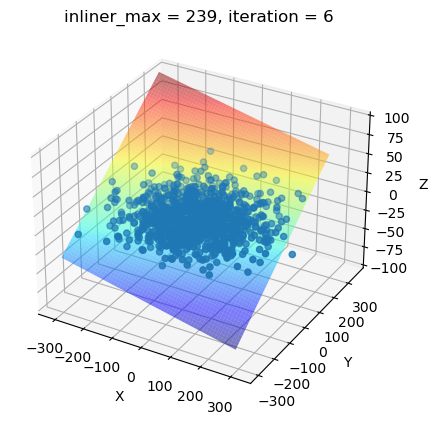

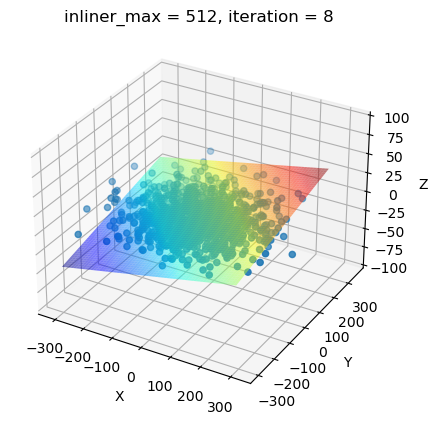

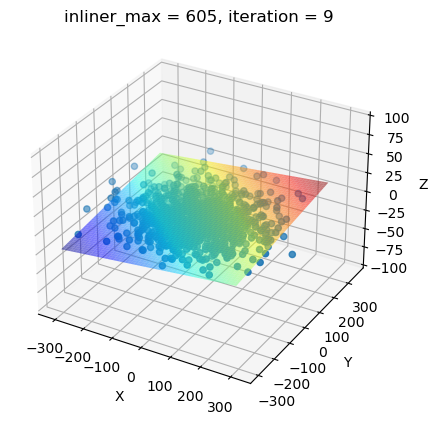

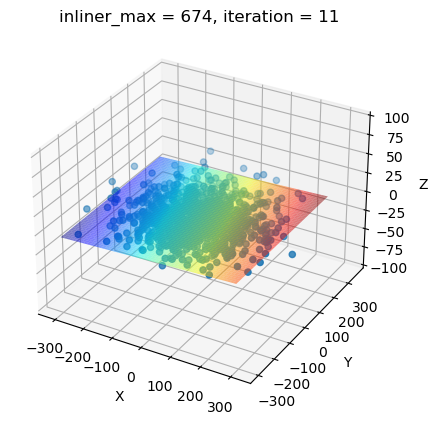

============= 3D RANSAC Result =============
Total Points =  1000
Maximum inliner Points =  674


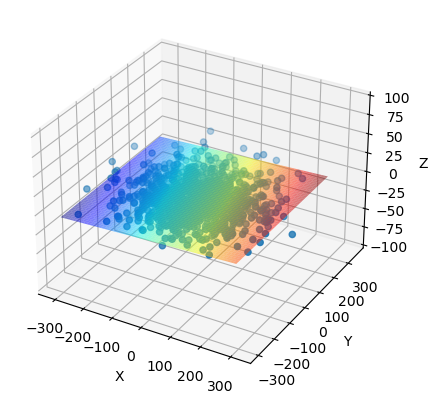

In [490]:
x = np.random.normal(0,100,1000)
y = np.random.normal(0,100,1000)
z = np.random.normal(0,10,1000)

###########################################################

iteration_max = 100
inliner_max = 0

ransac_plane = 0

offset = 1

for iteration in range(iteration_max):

    # 1. Select the points randomly
    x_select = random.sample(x.tolist(), 3)
    y_select = random.sample(y.tolist(), 3)
    z_select = random.sample(z.tolist(), 3)

    # 2. Plane equation
    point1 = np.array([x_select[0], y_select[0], z_select[0]])
    point2 = np.array([x_select[1], y_select[1], z_select[1]])
    point3 = np.array([x_select[2], y_select[2], z_select[2]])

    v12 = point2 - point1
    v13 = point3 - point1

    n = np.cross(v12, v13)
    d = -np.inner(n, point1)

    # 평면의 방정식
    X = np.arange(-300, 300, 10)
    Y = np.arange(-300, 300, 10)
    X, Y = np.meshgrid(X, Y)
    Z = (-n[0]/n[2] * X) + (-n[1]/n[2] * Y) - d/n[2]
    Z_upper = Z + offset
    Z_lower = Z - offset

    # 3. Calculate the number of the inliner points

    inliner_cnt = 0

    for i in range(len(z)):

        check_z_upper = (-n[0]/n[2] * x[i]) + (-n[1]/n[2] * y[i]) - d/n[2] + 10
        check_z_lower = (-n[0]/n[2] * x[i]) + (-n[1]/n[2] * y[i]) - d/n[2] - 10

        if(z[i] < check_z_upper and z[i] > check_z_lower):
            inliner_cnt = inliner_cnt + 1

    # 4. Find the maximum inliner points
    if(inliner_max < inliner_cnt):
        inliner_max = inliner_cnt
        ransac_plane = Z
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(x, y, z, cmap=cm.jet)
        ax.plot_surface(X, Y, ransac_plane, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)

        # Limit
        ax.axes.set_zlim3d(bottom = -100, top = 100) 

        # Label
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        # ax.view_init(azim=0, elev=0)

        plt.title('inliner_max = ' + str(inliner_max) + ", " + 'iteration = ' + str(iteration))
        plt.rcParams['figure.figsize'] = [5.0, 5.0]
        plt.show()
        
print("============= 3D RANSAC Result =============")
print("Total Points = ", len(z))
print("Maximum inliner Points = ", inliner_max)
        
###########################################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, cmap=cm.jet)
ax.plot_surface(X, Y, ransac_plane, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)

# Limit
ax.axes.set_zlim3d(bottom = -100, top = 100) 

# Label
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(azim=0, elev=0)

plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.show()